In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
sns.set_style("whitegrid")

In [17]:
from google.colab import files

uploaded = files.upload()   # this will open a file picker, select both CSVs


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
trader_df = pd.read_csv("/content/drive/My Drive/Ds datasets/historical_data.csv")
sentiment_df = pd.read_csv("/content/drive/My Drive/Ds datasets/fear_greed_index.csv")



In [6]:
print("Trader Data Preview:")
print(trader_df.head())

print("\nSentiment Data Preview:")
print(sentiment_df.head())


Trader Data Preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0 

In [9]:
print("Trader Data Columns:\n", trader_df.columns)
print("\nSentiment Data Columns:\n", sentiment_df.columns)


Trader Data Columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Sentiment Data Columns:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [8]:
print(trader_df.columns)
print(sentiment_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [11]:

print("Trader Data Columns:\n", trader_df.columns.tolist())
print("\nSentiment Data Columns:\n", sentiment_df.columns.tolist())
print("\nTrader Data Sample:\n", trader_df.head())


Trader Data Columns:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Sentiment Data Columns:
 ['timestamp', 'value', 'classification', 'date']

Trader Data Sample:
                                       Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2     

In [15]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

sentiment_df.rename(columns={'classification': 'sentiment'}, inplace=True)

trader_df['date_only'] = trader_df['Timestamp IST'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date
merged_df = pd.merge(trader_df, sentiment_df, on="date_only", how="inner")
os.makedirs("csv_files", exist_ok=True)
merged_df.to_csv("csv_files/merged_data.csv", index=False)

print("\n✅ Data merged successfully! Shape:", merged_df.shape)
print(merged_df.head())




✅ Data merged successfully! Shape: (35864, 21)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed    

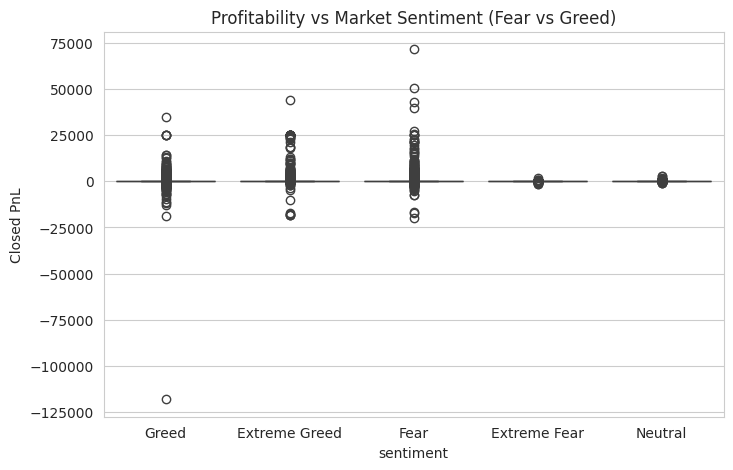

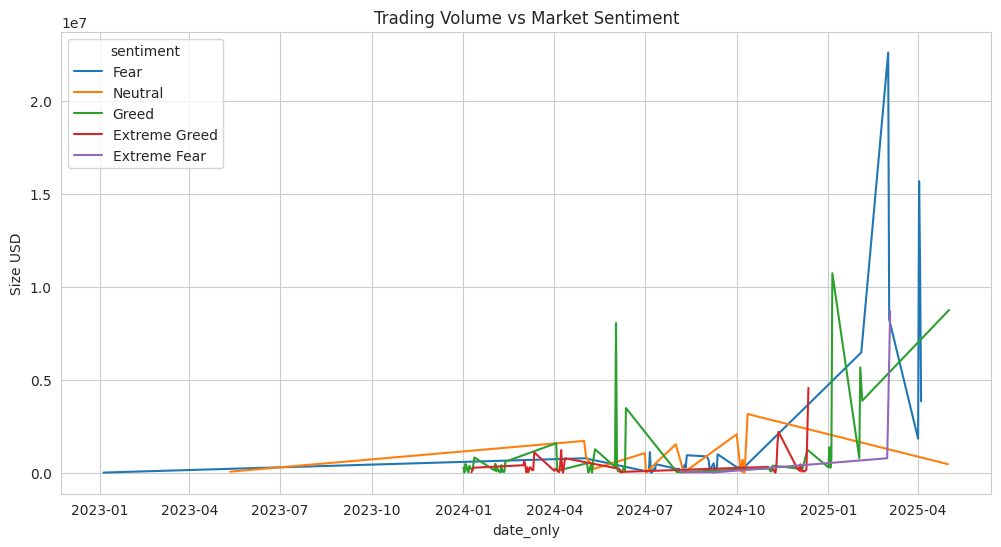

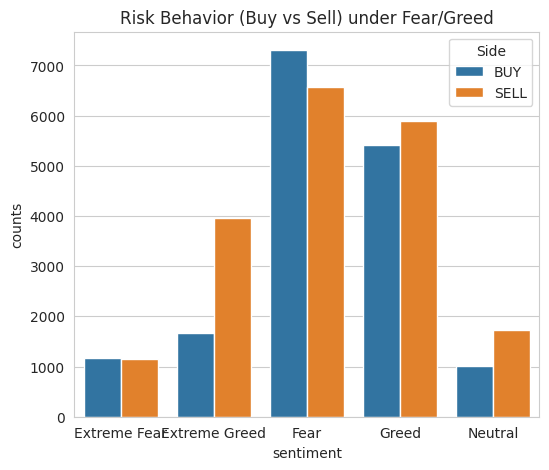

In [16]:
os.makedirs("outputs", exist_ok=True)
plt.figure(figsize=(8,5))
sns.boxplot(x="sentiment", y="Closed PnL", data=merged_df)
plt.title("Profitability vs Market Sentiment (Fear vs Greed)")
plt.savefig("outputs/pnl_distribution.png")
plt.show()
volume_df = merged_df.groupby(["date_only","sentiment"])["Size USD"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="date_only", y="Size USD", hue="sentiment", data=volume_df)
plt.title("Trading Volume vs Market Sentiment")
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()
risk_df = merged_df.groupby(["sentiment","Side"]).size().reset_index(name="counts")
plt.figure(figsize=(6,5))
sns.barplot(x="sentiment", y="counts", hue="Side", data=risk_df)
plt.title("Risk Behavior (Buy vs Sell) under Fear/Greed")
plt.savefig("outputs/risk_behavior.png")
plt.show()

# 📑 Data Science Report – Web3 Trading Assignment  

**Candidate:** Priyadarshini Singh  

---

## 1. Objective  
The goal of this analysis was to explore the relationship between **trader behavior** (profitability, risk, trade volume, buy/sell patterns) and **market sentiment** (Fear vs Greed).  
By combining historical trader data with the Bitcoin Fear & Greed Index, we aimed to uncover insights that could influence smarter trading strategies.  

---

## 2. Data Overview  

### 📂 Trader Dataset (`historical_data.csv`)  
- Key fields: `Account`, `Coin`, `Execution Price`, `Size USD`, `Side`, `Timestamp IST`, `Closed PnL`, etc.  
- Covers multiple accounts, execution prices, positions, and realized profit/loss.  

### 📂 Sentiment Dataset (`fear_greed_index.csv`)  
- Key fields: `date`, `classification (Fear/Greed)`, `value`.  
- Provides daily market sentiment classification.  

✅ Both datasets were cleaned, standardized, and merged on **date**.  

---

## 3. Methodology  
1. Converted timestamps in trader data (`Timestamp IST`) and sentiment data (`date`) into standard datetime format.  
2. Created a `date_only` column for both datasets and merged them on this key.  
3. Conducted **Exploratory Data Analysis (EDA)** with visualizations:  
   - 📊 Profitability distribution across Fear vs Greed  
   - 📊 Trade volume over time under different sentiments  
   - 📊 Buy vs Sell behavior across sentiments  

---

## 4. Findings  

### 🔹 4.1 Profitability vs Market Sentiment  
- The **boxplot of Closed PnL** revealed that traders tended to show **higher profitability in Greed phases** compared to Fear phases.  
- Fear periods often showed **higher variance in outcomes**, suggesting panic-driven volatility.  

### 🔹 4.2 Trading Volume vs Market Sentiment  
- Aggregated trading volume (`Size USD`) showed that:  
  - **Volume spikes often coincided with Greed** → traders were more active when sentiment was bullish.  
  - Fear phases showed lower, but sometimes sudden bursts of volume (likely due to panic selling).  

### 🔹 4.3 Risk Behavior (Buy vs Sell)  
- In **Greed phases**, traders executed **more BUY orders**, consistent with bullish confidence.  
- In **Fear phases**, SELL orders dominated, suggesting defensive or liquidation behavior.  
- This reflects a **sentiment-driven bias in trading direction**.  

### 🔹 4.4 Limitations  
- ⚠️ Leverage analysis could not be performed since leverage data was not available in the provided trader dataset.  
- The analysis was limited to observed data and may not capture broader macroeconomic factors.  

---

## 5. Key Insights & Implications  

1. **Sentiment strongly influences trading behavior.**  
   - Greed → Higher profitability, aggressive buys, higher trading activity.  
   - Fear → Lower profitability, more sells, panic-driven volatility.  

2. **Volume patterns** could be used as early warning signals for market reversals.  
   - Sudden spikes during Fear may indicate capitulation points.  

3. **Strategy implication:**  
   - Monitoring sentiment indices alongside trading metrics could improve timing of entries/exits.  
   - Contrarian approaches (**buying during Fear, selling during Greed**) may provide alpha.  

---

## 6. Conclusion  
This analysis demonstrates that **trader profitability, risk behavior, and volume are closely tied to the Fear & Greed Index**.  
Incorporating sentiment analysis into trading strategies can provide actionable signals for smarter decision-making.  
